### Merge data

In [4]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import numpy as np
pd.set_option('display.max_columns', 500)
sns.set_palette(palette="husl")

In [5]:
def find_common(column_names_f, column_names_s):
    return np.intersect1d(np.array(column_names_f), np.array(column_names_s))

def remove_char(series):
    return series.str.replace("'", "")

#### BoardingData

In [6]:
BoardingData_path = "normal_data\\BoardingData_2_normal.csv"
date_parser = lambda x: pd.to_datetime(x, format="%d.%m.%Y")
BoardingData_df = pd.read_csv(BoardingData_path, sep=";")
BoardingData_df["PASSENGER_BIRTH_DATE"] = pd.to_datetime(BoardingData_df["PASSENGER_BIRTH_DATE"])
BoardingData_df["DEPARTURE_DATE"] = pd.to_datetime(BoardingData_df["DEPARTURE_DATE"])
BoardingData_df["FIRST_LAST_NAME"] = remove_char(BoardingData_df["FIRST_LAST_NAME"])
BoardingData_df.head(3) # DEPARTURE_TIME

,PATERNITY,FIRST_LAST_NAME,PASSENGER_SEX,PASSENGER_BIRTH_DATE,PASSENGER_DOCUMENT,BOOKING_CODE,TICKET_NUMBER,BAGGAGE,DEPARTURE_DATE,DEPARTURE_TIME,FLIGHT_NUMBER,CODE_SHARE,FLIGHT_TO,AGE,FLIGHTS_QUANTITY
0,ANATOLEVNA,MAIIA BARANOVA,Female,1970-05-22,1 548 113 497,FOWFJE,120000000000000,Delayed,2017-12-01,15:50,SU5613,Own,KHABAROVSK,46,16
1,A,MAIIA BARANOVA,Female,1970-05-22,1 548 113 497,RIWCDE,2900000000000000,Delayed,2017-04-03,20:30,SU5640,Own,KRASNOYARSK,46,16
2,ANATOLEVNA,MAIIA BARANOVA,Female,1970-05-22,1 548 113 497,LTOZUQ,368000000000000,Registered,2017-05-03,21:35,SU1487,Own,MOSCOW,46,16


___

#### boardingPassDotAero

In [7]:
boardingPassDotAero_path = "normal_data\\boardingPassDotAero_normal.csv"
boardingPassDotAero_df = pd.read_csv(boardingPassDotAero_path, sep=";")
boardingPassDotAero_df["DEPARTURE_DATE"] = pd.to_datetime(BoardingData_df["DEPARTURE_DATE"])
boardingPassDotAero_df["FIRST_LAST_NAME"] = remove_char(boardingPassDotAero_df["FIRST_LAST_NAME"])
boardingPassDotAero_df.head(3)

,SEQUENCE,FIRST_LAST_NAME,SEQ_LETTER,FLIGHT_NUMBER,FLIGHT_FROM,FLIGHT_TO,AIRPORT_FROM,AIRPORT_TO,DEPARTURE_DATE,DEPARTURE_TIME,PNR,TICKET
0,32,LIDIYA ZHDANOVA,Y,SU5436,VLADIVOSTOK,SEOUL,VVO,REA,2017-12-01,11:25,DYELAO,"7,10025E+15"
1,50,SVIATOSLAV SOKOLOV,Y,SU5436,VLADIVOSTOK,SEOUL,VVO,REA,2017-04-03,11:25,JWARRD,"7,6089E+15"
2,32,SVIATOSLAV SUKHANOV,Y,SU5436,VLADIVOSTOK,SEOUL,VVO,REA,2017-05-03,11:25,SETJJH,"5,27258E+14"


___

In [8]:
common_boardingPassDotAero_BoardingData = find_common(boardingPassDotAero_df.columns, BoardingData_df.columns)
common_boardingPassDotAero_BoardingData

array(['DEPARTURE_DATE', 'DEPARTURE_TIME', 'FIRST_LAST_NAME',
       'FLIGHT_NUMBER', 'FLIGHT_TO'], dtype=object)

#### PointzAgregatorPass

In [9]:
PointzAgregatorPass_path = "normal_data\\PointzAgregatorPassDotAero_ready.csv"
PointzAgregatorPass_df = pd.read_csv(PointzAgregatorPass_path, sep=";")
PointzAgregatorPass_df["DEPARTURE_DATE"] = pd.to_datetime(BoardingData_df["DEPARTURE_DATE"])
PointzAgregatorPass_df["UID"] = PointzAgregatorPass_df["UID"].astype(str)
PointzAgregatorPass_df["FIRST_LAST_NAME"] = remove_char(PointzAgregatorPass_df["FIRST_LAST_NAME"])
PointzAgregatorPass_df.head(3)

,UID,FIRST_LAST_NAME,BP_NUMBER,BONUSPROGRAMM,FLIGHT_NUMBER,DEPARTURE_DATE,AIRPORT_FROM,AIRPORT_TO,FARE,FLIGHTS_QUANTITY,FLIGHTS_WITH_OTHER
0,613142142,IAROMIR ZVEREV,FB 171388778,Flying Blue,KE827,2017-12-01,REA,SZX,YGRPZT,2,NaN
1,613142142,IAROMIR ZVEREV,FB 171388778,Flying Blue,MU9706,2017-04-03,PEK,BSD,YSTNYV,2,NaN
2,103197717,VITALINA KOROVINA,KE 696768759,Korean Air SKYPASS,DL5058,2017-05-03,CHA,ATL,YRSTKY,4,NaN


___

#### Sirena-export 

In [10]:
SirenaExport_path = "normal_data\\Sirena-export_copy_NORMAL.csv"
SirenaExport_df = pd.read_csv(SirenaExport_path, sep=";")
SirenaExport_df["ARRIVAL_DATE"] = pd.to_datetime(SirenaExport_df["ARRIVAL_DATE"])
SirenaExport_df["TICKET_NUMBER"] = SirenaExport_df["TICKET_NUMBER"].astype(str)
SirenaExport_df["PASSENGER_DOCUMENT"] = SirenaExport_df["PASSENGER_DOCUMENT"].astype(str)
SirenaExport_df["FIRST_LAST_NAME"] = remove_char(SirenaExport_df["FIRST_LAST_NAME"])
SirenaExport_df.head(3) # PASSENGER_DOCUMENT

,FIRST_LAST_NAME,PATERNITY,DEPARTURE_TIME,ARRIVAL_DATE,ARRIVAL_TIME,FLIGHT_NUMBER,AIRPORT_FROM,AIRPORT_TO,TICKET_NUMBER,PASSENGER_DOCUMENT,MEAL,FARE,BAGGAGE,AGENT_INFO,FLIGHTS
0,SAMIR KOLOSOV,TAMERLANOVICH,10:50,2017-12-05,12:30,SU1277NO,KZN,SVO,"1,78E+15",2 244 645 520,FPML,Y,YSTNNF,TRAVELGENIO,5
1,SAMIR KOLOSOV,TAMERLANOVICH,6:40,2017-12-29,11:10,SU1434NO,SVO,MQF,5E+15,2 244 645 520,LCML,Y,YGRPBV,GO2SEE,5
2,LYUBOV ERSHOVA,ZAKHAROVNA,10:25,2017-02-26,13:25,SU5610NO,VVO,UUS,"7,95E+15",776 380 126,VGML,Y,YRSTSC1PC,ONETWOTRIP,3


____

## Соединение boardingPassDotAero_df и BoardingData_df

In [11]:
merged_2 = pd.merge(boardingPassDotAero_df, BoardingData_df, how="outer", 
                  on=common_boardingPassDotAero_BoardingData.tolist(), suffixes=('', '_y'))
merged_2.head()
# common_boardingPassDotAero_BoardingData

,SEQUENCE,FIRST_LAST_NAME,SEQ_LETTER,FLIGHT_NUMBER,FLIGHT_FROM,FLIGHT_TO,AIRPORT_FROM,AIRPORT_TO,DEPARTURE_DATE,DEPARTURE_TIME,PNR,TICKET,PATERNITY,PASSENGER_SEX,PASSENGER_BIRTH_DATE,PASSENGER_DOCUMENT,BOOKING_CODE,TICKET_NUMBER,BAGGAGE,CODE_SHARE,AGE,FLIGHTS_QUANTITY
0,32.0,LIDIYA ZHDANOVA,Y,SU5436,VLADIVOSTOK,SEOUL,VVO,REA,2017-12-01,11:25,DYELAO,"7,10025E+15",NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,50.0,SVIATOSLAV SOKOLOV,Y,SU5436,VLADIVOSTOK,SEOUL,VVO,REA,2017-04-03,11:25,JWARRD,"7,6089E+15",NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,32.0,SVIATOSLAV SUKHANOV,Y,SU5436,VLADIVOSTOK,SEOUL,VVO,REA,2017-05-03,11:25,SETJJH,"5,27258E+14",NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,77.0,DENIS ZELENIN,Y,SU5436,VLADIVOSTOK,SEOUL,VVO,REA,2017-07-17,11:25,MZZNJI,"3,69605E+15",NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,87.0,OSTROVSKAYA IRINA,Y,SU5436,VLADIVOSTOK,SEOUL,VVO,REA,2017-02-05,11:25,NJNNPC,"7,47061E+15",NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Соединение merged_2 и PointzAgregatorPass

In [12]:
# Находим общие колонки
common_merged_2_PointzAgregatorPass_df = find_common(merged_2.columns, PointzAgregatorPass_df.columns)

In [13]:
merged_3 = pd.merge(merged_2, PointzAgregatorPass_df, how="outer", 
                  on=common_merged_2_PointzAgregatorPass_df.tolist(), suffixes=('', '_y'))
merged_3.head()

,SEQUENCE,FIRST_LAST_NAME,SEQ_LETTER,FLIGHT_NUMBER,FLIGHT_FROM,FLIGHT_TO,AIRPORT_FROM,AIRPORT_TO,DEPARTURE_DATE,DEPARTURE_TIME,PNR,TICKET,PATERNITY,PASSENGER_SEX,PASSENGER_BIRTH_DATE,PASSENGER_DOCUMENT,BOOKING_CODE,TICKET_NUMBER,BAGGAGE,CODE_SHARE,AGE,FLIGHTS_QUANTITY,UID,BP_NUMBER,BONUSPROGRAMM,FARE,FLIGHTS_WITH_OTHER
0,32.0,LIDIYA ZHDANOVA,Y,SU5436,VLADIVOSTOK,SEOUL,VVO,REA,2017-12-01,11:25,DYELAO,"7,10025E+15",NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,50.0,SVIATOSLAV SOKOLOV,Y,SU5436,VLADIVOSTOK,SEOUL,VVO,REA,2017-04-03,11:25,JWARRD,"7,6089E+15",NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,32.0,SVIATOSLAV SUKHANOV,Y,SU5436,VLADIVOSTOK,SEOUL,VVO,REA,2017-05-03,11:25,SETJJH,"5,27258E+14",NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,77.0,DENIS ZELENIN,Y,SU5436,VLADIVOSTOK,SEOUL,VVO,REA,2017-07-17,11:25,MZZNJI,"3,69605E+15",NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,87.0,OSTROVSKAYA IRINA,Y,SU5436,VLADIVOSTOK,SEOUL,VVO,REA,2017-02-05,11:25,NJNNPC,"7,47061E+15",NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Полное соединение файлов
## Соединение merged_3 и SirenaExport_df

In [14]:
# Находим общие колонки
common_merged_3_SirenaExport_df = find_common(merged_3.columns, SirenaExport_df.columns)

In [15]:
merged_4 = pd.merge(merged_3, SirenaExport_df, how="outer", 
                  on=common_merged_3_SirenaExport_df.tolist(), suffixes=('', '_y'))
merged_4.head()

,SEQUENCE,FIRST_LAST_NAME,SEQ_LETTER,FLIGHT_NUMBER,FLIGHT_FROM,FLIGHT_TO,AIRPORT_FROM,AIRPORT_TO,DEPARTURE_DATE,DEPARTURE_TIME,PNR,TICKET,PATERNITY,PASSENGER_SEX,PASSENGER_BIRTH_DATE,PASSENGER_DOCUMENT,BOOKING_CODE,TICKET_NUMBER,BAGGAGE,CODE_SHARE,AGE,FLIGHTS_QUANTITY,UID,BP_NUMBER,BONUSPROGRAMM,FARE,FLIGHTS_WITH_OTHER,ARRIVAL_DATE,ARRIVAL_TIME,MEAL,AGENT_INFO,FLIGHTS
0,32.0,LIDIYA ZHDANOVA,Y,SU5436,VLADIVOSTOK,SEOUL,VVO,REA,2017-12-01,11:25,DYELAO,"7,10025E+15",NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
1,50.0,SVIATOSLAV SOKOLOV,Y,SU5436,VLADIVOSTOK,SEOUL,VVO,REA,2017-04-03,11:25,JWARRD,"7,6089E+15",NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
2,32.0,SVIATOSLAV SUKHANOV,Y,SU5436,VLADIVOSTOK,SEOUL,VVO,REA,2017-05-03,11:25,SETJJH,"5,27258E+14",NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
3,77.0,DENIS ZELENIN,Y,SU5436,VLADIVOSTOK,SEOUL,VVO,REA,2017-07-17,11:25,MZZNJI,"3,69605E+15",NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
4,87.0,OSTROVSKAYA IRINA,Y,SU5436,VLADIVOSTOK,SEOUL,VVO,REA,2017-02-05,11:25,NJNNPC,"7,47061E+15",NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN


In [16]:
merged_4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 720047 entries, 0 to 720046
Data columns (total 32 columns):
SEQUENCE                359195 non-null float64
FIRST_LAST_NAME         720047 non-null object
SEQ_LETTER              359195 non-null object
FLIGHT_NUMBER           720047 non-null object
FLIGHT_FROM             359195 non-null object
FLIGHT_TO               372448 non-null object
AIRPORT_FROM            706794 non-null object
AIRPORT_TO              706794 non-null object
DEPARTURE_DATE          39759 non-null datetime64[ns]
DEPARTURE_TIME          395780 non-null object
PNR                     359195 non-null object
TICKET                  359195 non-null object
PATERNITY               36585 non-null object
PASSENGER_SEX           13253 non-null object
PASSENGER_BIRTH_DATE    13253 non-null datetime64[ns]
PASSENGER_DOCUMENT      36585 non-null object
BOOKING_CODE            6619 non-null object
TICKET_NUMBER           36585 non-null object
BAGGAGE                 33288 non-

In [17]:
merged_gr = merged_4.groupby(["DEPARTURE_DATE", "FLIGHT_NUMBER"], as_index=False).size().reset_index(name="FLIGHTS")
merged_gr = merged_gr.sort_values("FLIGHTS", ascending=False)

In [18]:
merged_gr.head()

,DEPARTURE_DATE,FLIGHT_NUMBER,FLIGHTS
205,2017-01-01,SU4606,14
2996,2017-01-23,SU4606,12
828,2017-01-04,SU4606,10
14805,2017-05-01,SU4600,10
2273,2017-01-18,SU4606,10


In [19]:
merged_gr.describe()

,FLIGHTS
count,34999.000000
mean,1.136004
std,0.502995
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,14.000000


C:\Users\callo\Miniconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


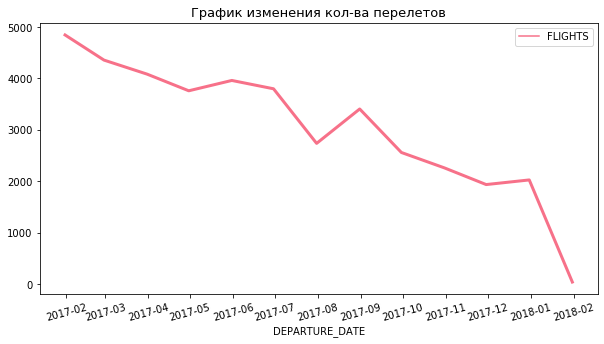

In [20]:
if "DEPARTURE_DATE" in list(merged_gr.columns):
    merged_gr = merged_gr.set_index("DEPARTURE_DATE")

plt.figure(figsize=(10, 5))
plt.title("График изменения кол-ва перелетов", fontsize=13)
plt.xticks(rotation=15)
resampled = merged_gr.resample('M').sum()
lpl = sns.lineplot(data=resampled, lw=3, )
lpl.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

In [21]:
cityes_gr = merged_4.groupby(["FLIGHT_FROM", "FLIGHT_TO"]).size().reset_index(name="FREQUENCY_FROM")
cityes_gr.head(2)

,FLIGHT_FROM,FLIGHT_TO,FREQUENCY_FROM
0,AALBORG,AMSTERDAM,36
1,AALESUND,AMSTERDAM,12


In [22]:
cityes_gr_2 = merged_4.groupby(["FLIGHT_TO", "FLIGHT_FROM"]).size().reset_index(name="FREQUENCY_TO")
cityes_gr_2.head(2)

,FLIGHT_TO,FLIGHT_FROM,FREQUENCY_TO
0,AALBORG,AMSTERDAM,31
1,AALESUND,AMSTERDAM,13


## Популярные города по перелетам

In [23]:
cityes_merge = pd.merge(cityes_gr, cityes_gr_2, how="outer", left_on=["FLIGHT_FROM", "FLIGHT_TO"], right_on=["FLIGHT_TO", "FLIGHT_FROM"])
cityes_merge = cityes_merge.dropna()
cityes_merge = cityes_merge.sort_values(by=["FREQUENCY_FROM", "FREQUENCY_TO"], ascending=False)
cityes_merge = cityes_merge.drop(columns=["FLIGHT_TO_x", "FLIGHT_TO_y"])
cityes_merge.columns = ["FLIGHT_FROM", "FREQUENCY_FROM", "FLIGHT_TO", "FREQUENCY_TO"]
cityes_merge.head(10)

,FLIGHT_FROM,FREQUENCY_FROM,FLIGHT_TO,FREQUENCY_TO
4995,MOSCOW,3939.0,SAINT PETERSBURG,3716.0
6641,SAINT PETERSBURG,3716.0,MOSCOW,3939.0
4987,MOSCOW,3137.0,PARIS,370.0
7116,SEOUL,2024.0,SEOUL,2024.0
4991,MOSCOW,1938.0,PRAGUE,780.0
4993,MOSCOW,1619.0,ROME,337.0
7617,SOCHI,1601.0,MOSCOW,1142.0
8388,VLADIVOSTOK,1398.0,SEOUL,130.0
8909,YEKATERINBURG,1297.0,MOSCOW,946.0
3585,KHABAROVSK,1264.0,YUZHNO,1001.0


In [24]:
merged_4["BAGGAGE"].value_counts()

Registered    3352
Delayed       3325
Transit       3279
YRSTFB          16
YGRPZO          16
              ... 
YFLXIK0PC        1
YSTNON2PC        1
YFLXOU0PC        1
YFLXOJ           1
YSTNDW1PC        1
Name: BAGGAGE, Length: 9432, dtype: int64

### Группуровка пассажиров по именам

In [25]:
names_df = merged_4.groupby(["FIRST_LAST_NAME"]).size().reset_index(name="FOUND_EQUAL_NAMES") # "DEPARTURE_DATE", "FLIGHT_NUMBER", 
names_df = names_df.sort_values(by="FOUND_EQUAL_NAMES", ascending=False)
names_df.head(10)

,FIRST_LAST_NAME,FOUND_EQUAL_NAMES
88225,LEONID PIROGOV,65
182860,ZAKHAR SHESTAKOV,65
124507,PETR ERMILOV,64
131584,RODION CHIZHOV,62
124539,PETR GOROKHOV,62
39468,EGOR BYKOV,60
2819,ALBERT DAVYDOV,59
2369,AIDAR MOROZOV,59
25182,BOGDAN VINOGRADOV,57
130832,RINAT SEDOV,57


In [26]:
# FIRST_LAST_NAME
names_df = merged_4.groupby(["FIRST_LAST_NAME"]).count() # ().reset_index(name="FOUND_EQUAL_NAMES") # "DEPARTURE_DATE", "FLIGHT_NUMBER", 
#names_df = names_df.sort_values(by="FOUND_EQUAL_NAMES", ascending=False)
names_df.describe()

,SEQUENCE,SEQ_LETTER,FLIGHT_NUMBER,FLIGHT_FROM,FLIGHT_TO,AIRPORT_FROM,AIRPORT_TO,DEPARTURE_DATE,DEPARTURE_TIME,PNR,TICKET,PATERNITY,PASSENGER_SEX,PASSENGER_BIRTH_DATE,PASSENGER_DOCUMENT,BOOKING_CODE,TICKET_NUMBER,BAGGAGE,CODE_SHARE,AGE,FLIGHTS_QUANTITY,UID,BP_NUMBER,BONUSPROGRAMM,FARE,FLIGHTS_WITH_OTHER,ARRIVAL_DATE,ARRIVAL_TIME,MEAL,AGENT_INFO,FLIGHTS
count,187642.000000,187642.000000,187642.000000,187642.000000,187642.000000,187642.000000,187642.000000,187642.000000,187642.000000,187642.000000,187642.000000,187642.000000,187642.000000,187642.000000,187642.000000,187642.000000,187642.000000,187642.000000,187642.000000,187642.000000,187642.000000,187642.000000,187642.000000,187642.000000,187642.000000,187642.000000,187642.000000,187642.000000,187642.000000,187642.000000,187642.000000
mean,1.914257,1.914257,3.837345,1.914257,1.984886,3.766715,3.766715,0.211888,2.109229,1.914257,1.914257,0.194972,0.070629,0.070629,0.194972,0.035275,0.194972,0.177402,0.070629,0.070629,1.798744,1.728115,1.728115,1.728115,1.852458,0.000906,0.124343,0.124343,0.124343,0.124343,0.124343
std,1.803246,1.803246,5.118457,1.803246,1.968418,4.996876,4.996876,1.202297,2.023265,1.803246,1.803246,0.925638,0.756885,0.756885,0.925638,0.400792,0.925638,0.771626,0.756885,0.756885,4.667214,4.549458,4.549458,4.549458,4.681193,0.123886,0.435321,0.435321,0.435321,0.435321,0.435321
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,2.000000,4.000000,2.000000,2.000000,4.000000,4.000000,0.000000,3.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,26.000000,26.000000,65.000000,26.000000,26.000000,65.000000,65.000000,35.000000,26.000000,26.000000,26.000000,18.000000,16.000000,16.000000,18.000000,11.000000,18.000000,15.000000,16.000000,16.000000,60.000000,60.000000,60.000000,60.000000,61.000000,27.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [27]:
# merged_4.to_csv("normal_data_update\\merged_data.csv", sep=";", index=False)